Columns	    :----                                            Description

Accident_ID	   :----                unique id assigned to each row

Accident_Type_Code	 :----          the type of accident (factor, not numeric)

Cabin_Temperature	       :----    the last recorded temperature before the incident, measured in degrees fahrenheit

Turbulence_In_gforces	    :----   the recorded/estimated turbulence experienced during the accident

Control_Metric	         :----      an estimation of how much control the pilot had during the incident given the factors at play

Total_Safety_Complaints    	 :----  number of complaints from mechanics prior to the accident

Days_Since_Inspection	:----       how long the plane went without inspection before the incident

Safety_Score	           :----    a measure of how safe the plane was deemed to be

Violations	         :----          number of violations that the aircraft received during inspections

Severity	   :----                a description (4 level factor) on the severity of the crash [Target]

In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir(r'D:\Hackerearth Airplane')
print(os.listdir())
df=pd.read_csv("train.csv")

['3c055e822d5b11ea.zip', 'Result.csv', 'Result01.csv', 'sample_submission.csv', 'test.csv', 'train.csv']


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [8]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

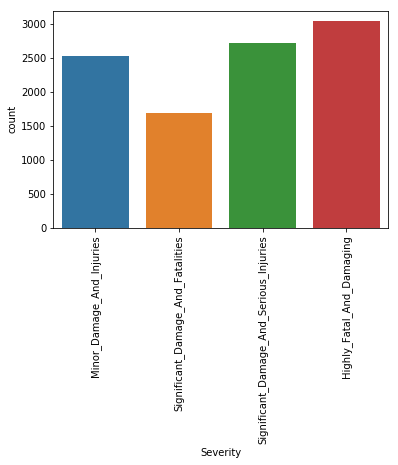

In [11]:
sns.countplot(df['Severity']) # Target Variable
plt.xticks(rotation=90)

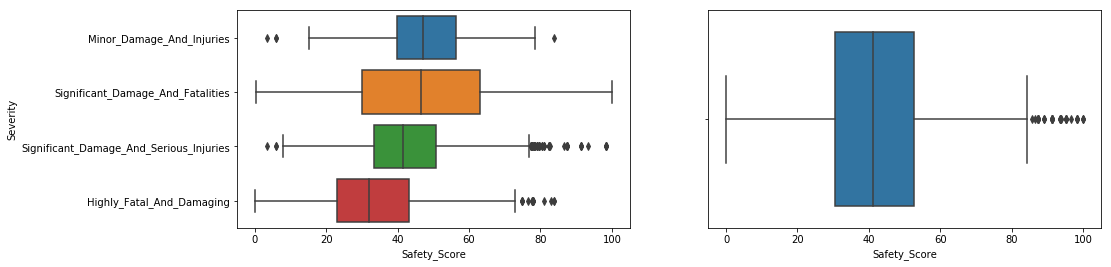

In [44]:
# Safety Score 
plt.subplots_adjust(left=12,right=14)
plt.subplot(1,2,1)
sns.boxplot(x=df['Safety_Score'],y=df['Severity'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Safety_Score'])

In [80]:
# For Numerical Data
def bar_plot(feature):
    df_1=df[df['Severity']=='Minor_Damage_And_Injuries']
    df_2=df[df['Severity']=='Significant_Damage_And_Fatalities']
    df_3=df[df['Severity']=='Significant_Damage_And_Serious_Injuries']
    df_4=df[df['Severity']=='Highly_Fatal_And_Damaging']
    
    plt.bar(['Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities','Significant_Damage_And_Serious_Injuries','Highly_Fatal_And_Damaging'],height=[df_1[feature].sum(),
    df_2[feature].sum(),
    df_3[feature].sum(),
    df_4[feature].sum()], color=['pink','black','blue','green'])
    plt.xticks(rotation=90)
    plt.ylabel(feature)

    

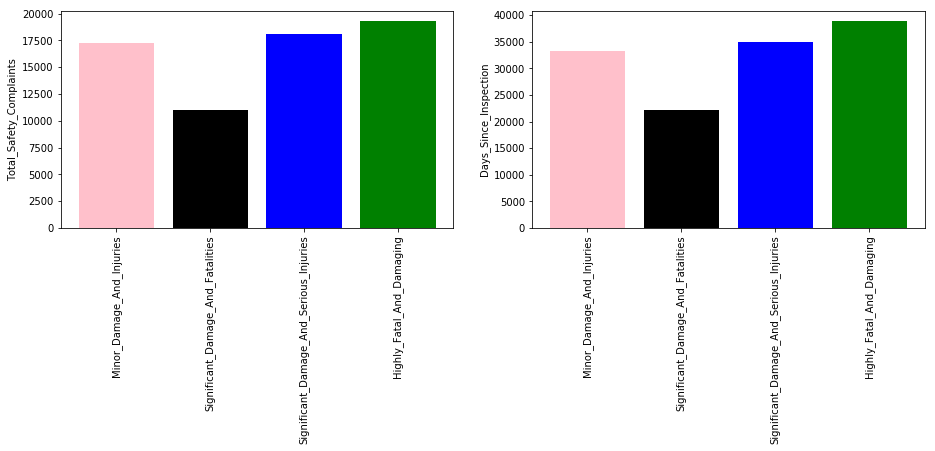

In [86]:
plt.subplots_adjust(left=12,right=14)
plt.subplot(1,2,1)
bar_plot("Total_Safety_Complaints")
plt.subplot(1,2,2)
bar_plot("Days_Since_Inspection")

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

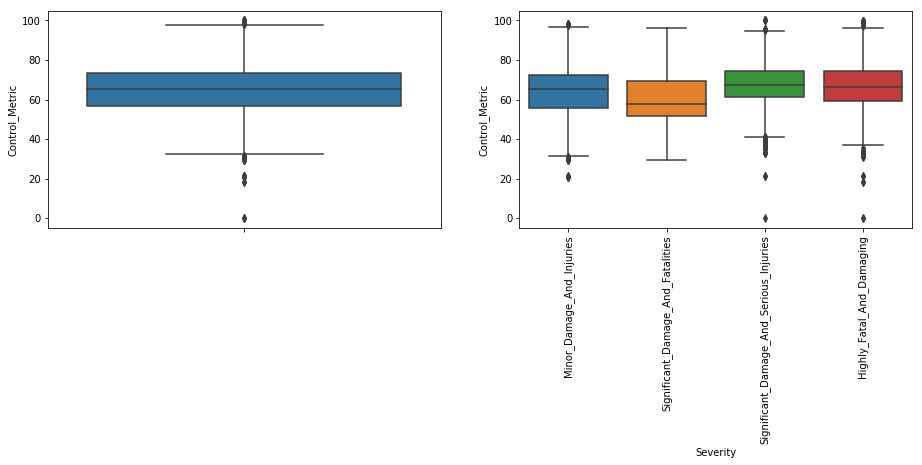

In [104]:
plt.subplots_adjust(left=12,right=14)
plt.subplot(1,2,1)
sns.boxplot(df['Control_Metric'],orient='v')
plt.subplot(1,2,2)
sns.boxplot(y=df['Control_Metric'],x=df['Severity'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

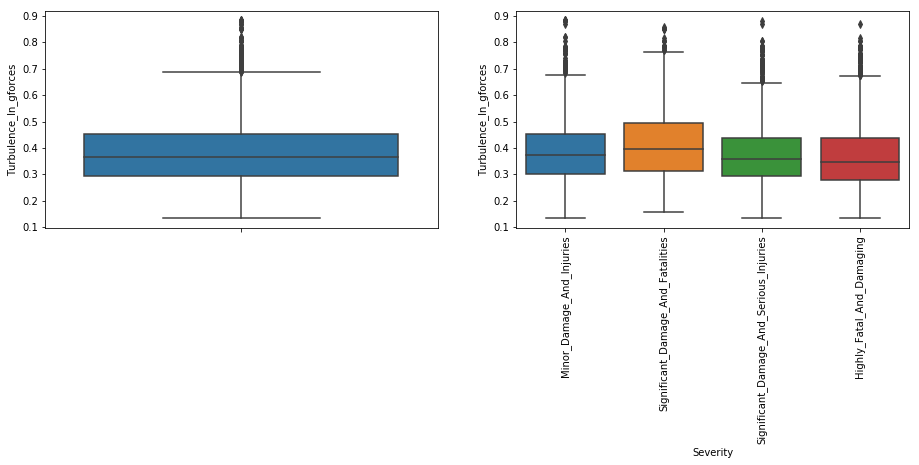

In [103]:
plt.subplots_adjust(left=12,right=14)
plt.subplot(1,2,1)
sns.boxplot(df['Turbulence_In_gforces'],orient='v')
plt.subplot(1,2,2)
sns.boxplot(y=df['Turbulence_In_gforces'],x=df['Severity'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

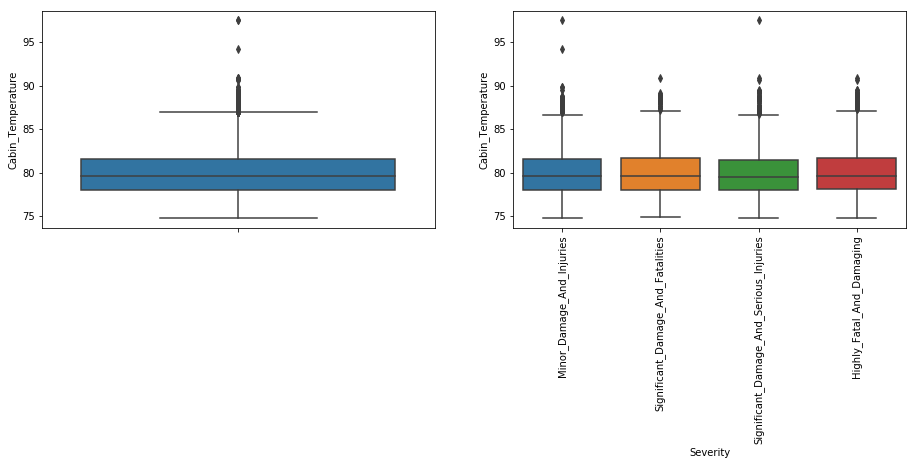

In [107]:
plt.subplots_adjust(left=12,right=14)
plt.subplot(1,2,1)
sns.boxplot(df['Cabin_Temperature'],orient='v')
plt.subplot(1,2,2)
sns.boxplot(y=df['Cabin_Temperature'],x=df['Severity'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

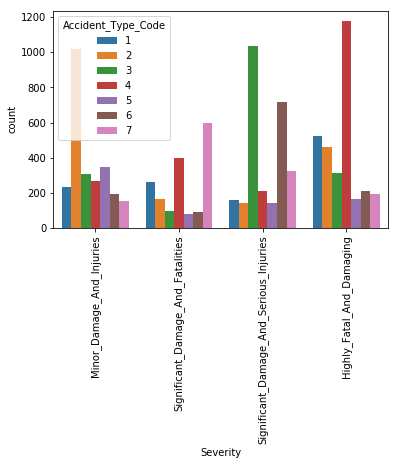

In [112]:
sns.countplot(x=df['Severity'],hue=df['Accident_Type_Code'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

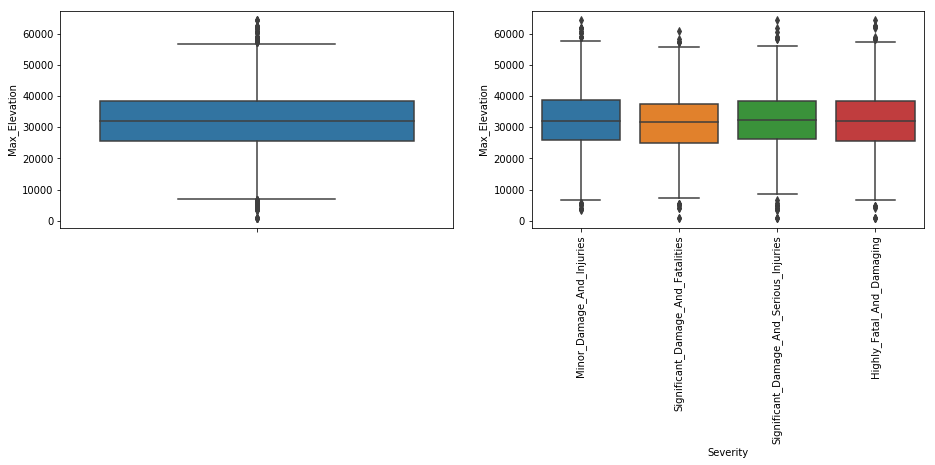

In [117]:
plt.subplots_adjust(left=12,right=14)
plt.subplot(1,2,1)
sns.boxplot(df['Max_Elevation'],orient='v')
plt.subplot(1,2,2)
sns.boxplot(y=df['Max_Elevation'],x=df['Severity'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

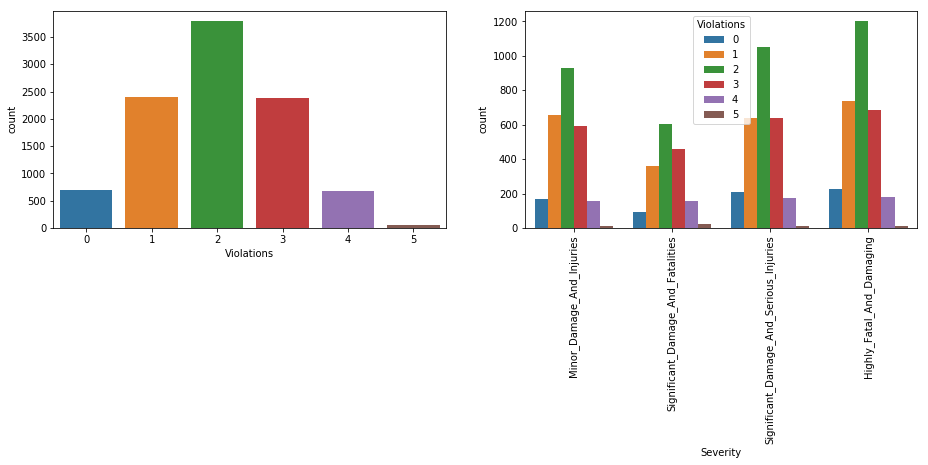

In [121]:
plt.subplots_adjust(left=12,right=14)
plt.subplot(1,2,1)
sns.countplot(df['Violations'])
plt.subplot(1,2,2)
sns.countplot(df['Severity'],hue=df['Violations'])
plt.xticks(rotation=90)


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

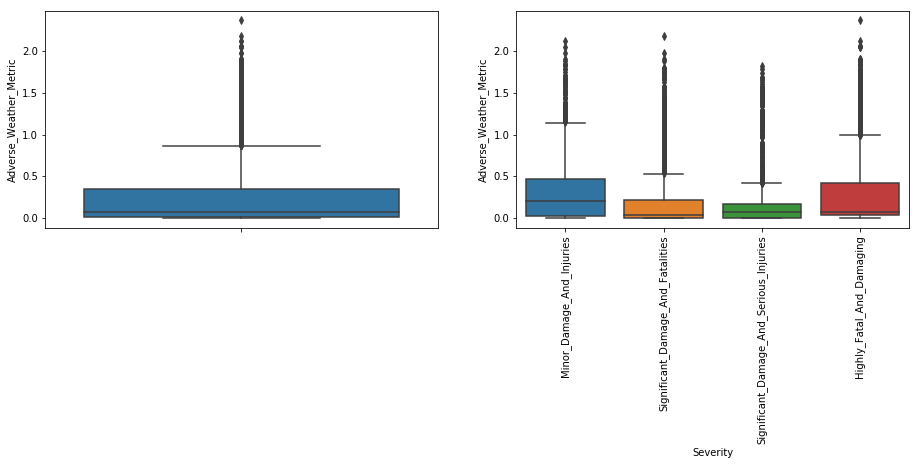

In [122]:
plt.subplots_adjust(left=12,right=14)
plt.subplot(1,2,1)
sns.boxplot(df['Adverse_Weather_Metric'],orient='v')
plt.subplot(1,2,2)
sns.boxplot(y=df['Adverse_Weather_Metric'],x=df['Severity'])
plt.xticks(rotation=90)